In [18]:
from amuse.lab import *
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import ast


def coordinate_plot(xlim,ylim,t_end,n,case,t_max):
    xaxis = []
    yaxis = []


    au = 1.5e13 # cm
    RSun = 696340e5 #cm


    times = np.arange(0, 1*n, 0.05)
    label_names = ["core", "gas", "earth"]

    # The csv file is otherwise too big to use
    csv.field_size_limit(sys.maxsize)

    # Make two dictionaries to save the coordinates in
    x_coordinates = dict()
    y_coordinates = dict()

    with open("t_end={}_n={}_{}/coordinates.csv".format(t_end, n, case)) as csvfile:
        coordinates = csv.reader(csvfile)

        for row in coordinates:
            # The ast.literal_eval makes from a string list a list with floats
            x_coordinates[row[0]] = ast.literal_eval(row[1])
            y_coordinates[row[0]] = ast.literal_eval(row[2])


    plt.figure(figsize=(12, 10))

    gravity_particles = read_set_from_file("t_end={}_n={}_{}/gravity_particles.amuse".format(t_end, n, case), "amuse", append_to_file=False)
    hydro_particles = read_set_from_file( "t_end={}_n={}_{}/hydro_particles.amuse".format(t_end, n, case), "amuse", append_to_file=False)

    # Coordinates for the inital gas, core and earth particles
    core = plt.scatter(hydro_particles.x[1:].value_in(units.cm)/RSun, hydro_particles.y[1:].value_in(units.cm)/RSun, color="bisque")
    gas = plt.scatter(hydro_particles.x[0].value_in(units.cm)/RSun, hydro_particles.y[0].value_in(units.cm)/RSun, color="orange")
    earth = plt.scatter(gravity_particles.x[0].value_in(units.cm)/RSun, gravity_particles.y[0].value_in(units.cm)/RSun, color="red")


    result = plt.scatter(np.array(x_coordinates["earth"])/RSun, np.array(y_coordinates["earth"])/RSun,s=30,
                      label="earth",c=times,cmap='viridis')
    
    # set the upper limit of the color bar, to have better insight of when the earth escapes 
    plt.clim(0,t_max)

    cbar = plt.colorbar(result)
    cbar.set_label(label = "Age [yr]", size = 15)
    cbar.ax.tick_params(labelsize = 15) 
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    plt.xlabel("x [RSun]",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("y [RSun]",fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(handles=[gas, core, earth], labels=label_names, loc="lower right",fontsize = 15)


    plt.title(r'Coordinates for $t_{end}$ = %s yr, n = %s, %s'% (t_end,n,case),fontsize=15)
    plt.tight_layout()
    plt.savefig("new_v/scatter_plot_t_end={}yr_n={}_{}.png".format(t_end, n, case))
    plt.show()
    plt.close()

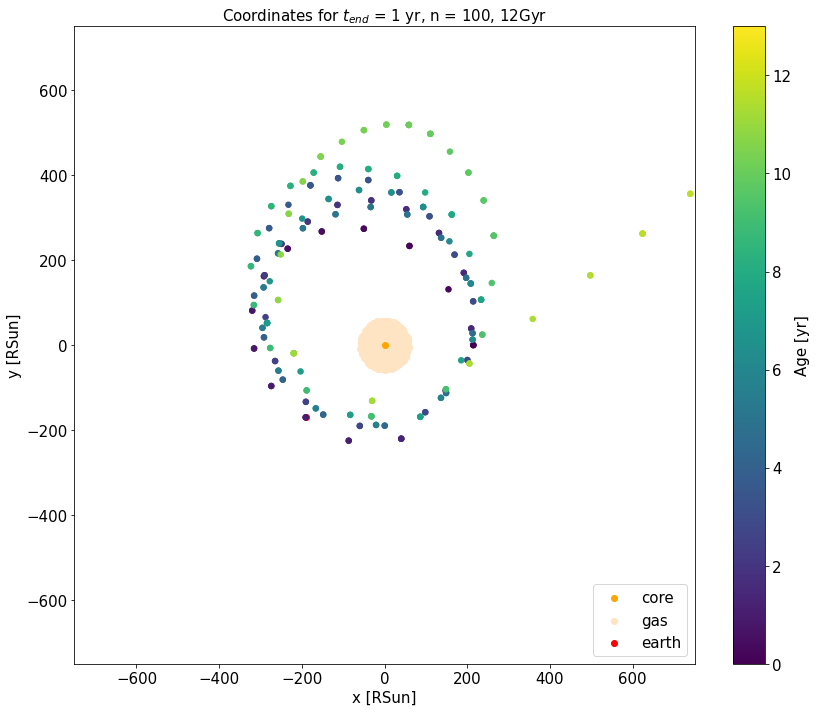

In [19]:
coordinate_plot([-750,750],[-750,750],1,100,'12Gyr',13)

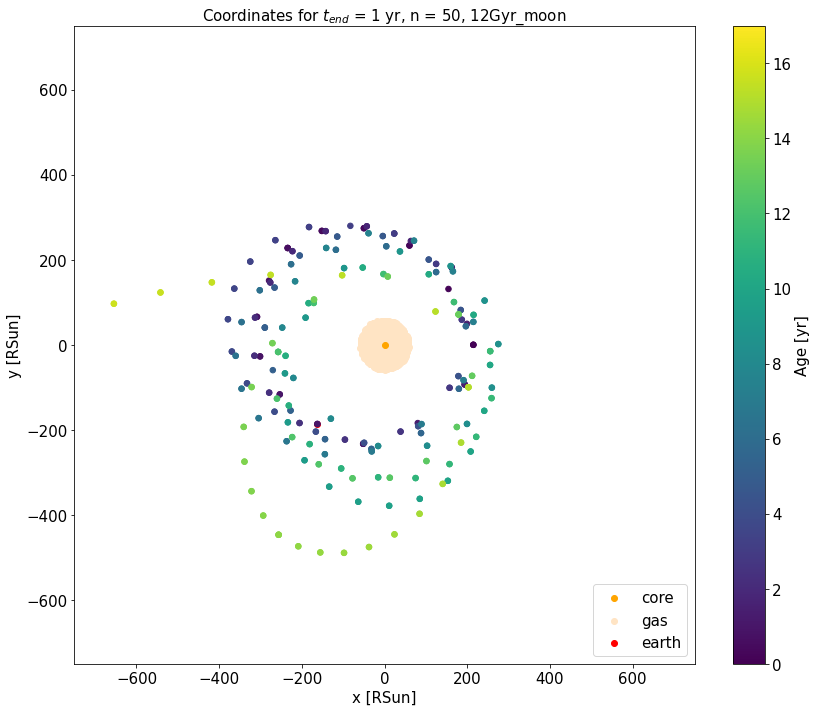

In [20]:
coordinate_plot([-750,750],[-750,750],1,50,'12Gyr_moon',17)

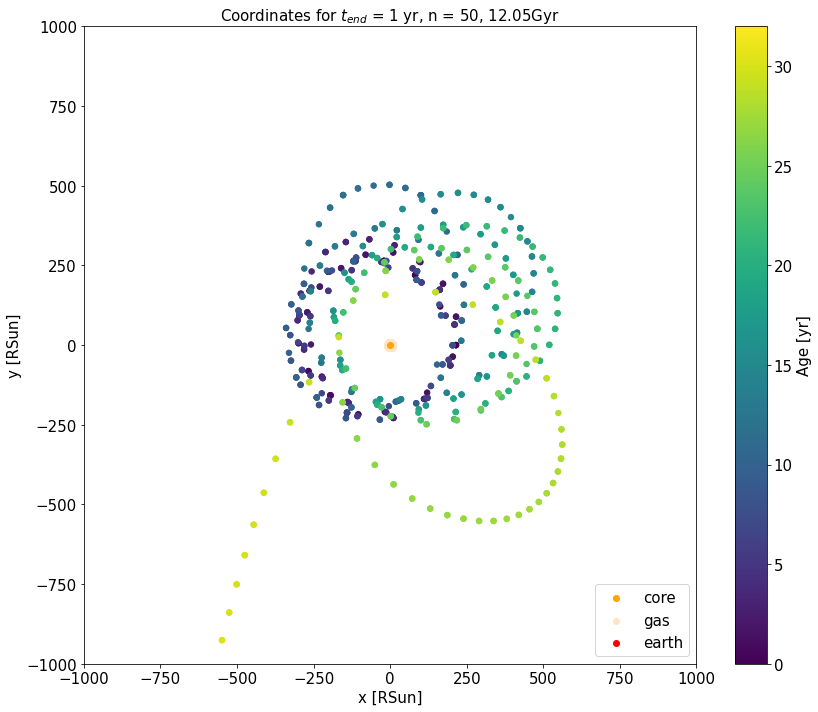

In [21]:
coordinate_plot([-1000,1000],[-1000,1000],1,50,'12.05Gyr',32)

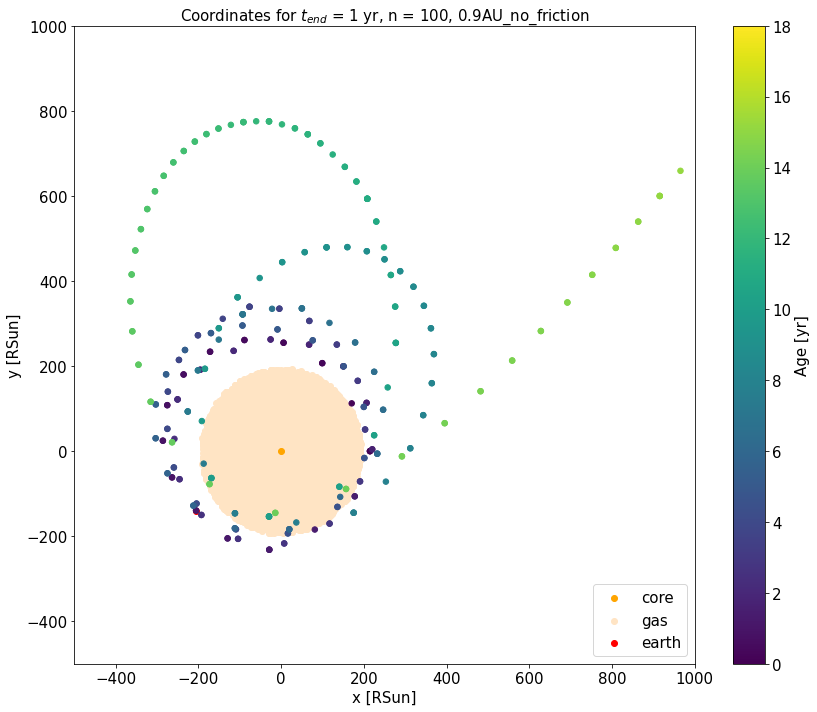

In [22]:
coordinate_plot([-500,1000],[-500,1000],1,100,'0.9AU_no_friction',18)

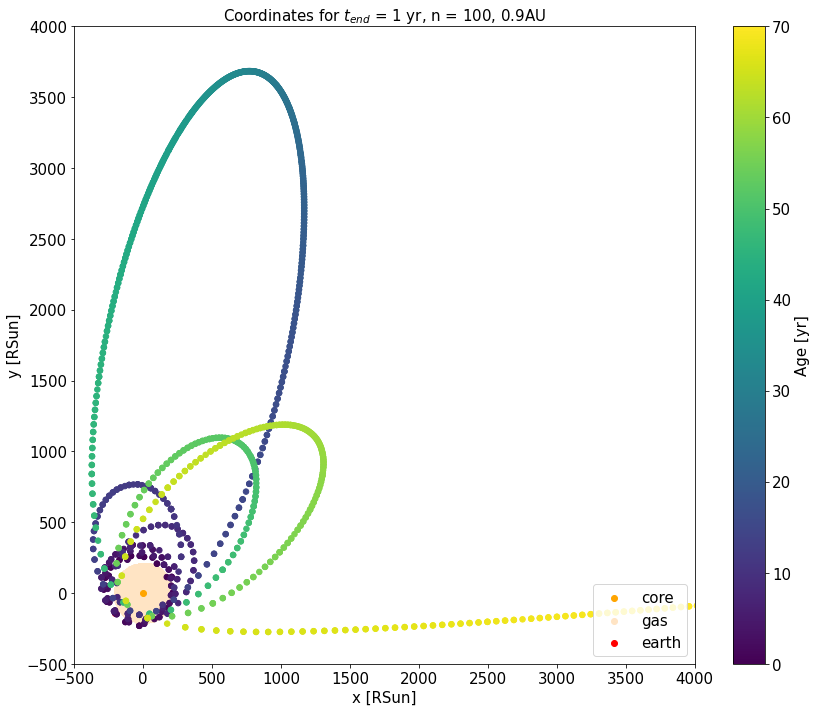

In [23]:
coordinate_plot([-500,4000],[-500,4000],1,100,'0.9AU',70)